In [422]:
import meitner
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [412]:
id = 'Au 4f 655'
x = meitner.Pes.from_vamas('au3-0001.pxt.vms', region_id=id, normalize=True, n_peaks=2, dict_keys=['Au'])

Excitation energy:
655.0 eV


In [413]:
x

In [414]:
np.array(x.df_dict['Au']['be'])

array([93. , 92.9, 92.8, 92.7, 92.6, 92.5, 92.4, 92.3, 92.2, 92.1, 92. ,
       91.9, 91.8, 91.7, 91.6, 91.5, 91.4, 91.3, 91.2, 91.1, 91. , 90.9,
       90.8, 90.7, 90.6, 90.5, 90.4, 90.3, 90.2, 90.1, 90. , 89.9, 89.8,
       89.7, 89.6, 89.5, 89.4, 89.3, 89.2, 89.1, 89. , 88.9, 88.8, 88.7,
       88.6, 88.5, 88.4, 88.3, 88.2, 88.1, 88. , 87.9, 87.8, 87.7, 87.6,
       87.5, 87.4, 87.3, 87.2, 87.1, 87. , 86.9, 86.8, 86.7, 86.6, 86.5,
       86.4, 86.3, 86.2, 86.1, 86. , 85.9, 85.8, 85.7, 85.6, 85.5, 85.4,
       85.3, 85.2, 85.1, 85. , 84.9, 84.8, 84.7, 84.6, 84.5, 84.4, 84.3,
       84.2, 84.1, 84. , 83.9, 83.8, 83.7, 83.6, 83.5, 83.4, 83.3, 83.2,
       83.1, 83. , 82.9, 82.8, 82.7, 82.6, 82.5, 82.4, 82.3, 82.2, 82.1,
       82. , 81.9, 81.8, 81.7, 81.6, 81.5, 81.4, 81.3, 81.2, 81.1, 81. ,
       80.9, 80.8, 80.7, 80.6, 80.5, 80.4, 80.3, 80.2, 80.1, 80. , 79.9,
       79.8, 79.7, 79.6, 79.5, 79.4, 79.3, 79.2, 79.1, 79. ])

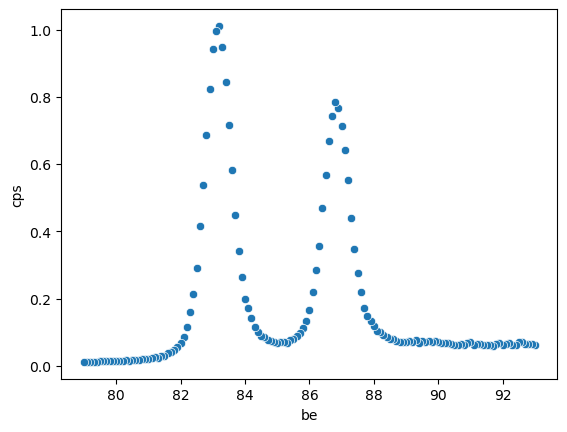

In [415]:
x.plot_survey(keys_list=['Au'])

In [416]:
print(x.n_peaks)

{'Au': 2}


In [417]:
x.generate_params([84,88])

name,value,initial value,min,max,vary,expression
data_Au_p0_amplitude,1.50000000,1.5,0.00000000,inf,True,
data_Au_p0_center,84.0000000,84,79.0000000,93.0000000,True,
data_Au_p0_sigma,1.00000000,1,0.00000000,inf,True,
data_Au_p0_gamma,1.00000000,1,0.00000000,inf,True,
data_Au_p0_gfwhm,2.00000000,None,-inf,inf,False,2*data_Au_p0_sigma
data_Au_p0_lfwhm,2.00000000,None,-inf,inf,False,2*data_Au_p0_gamma
data_Au_p0_glmix,0.50000000,None,0.00000000,1.00000000,False,data_Au_p0_lfwhm/(data_Au_p0_lfwhm+data_Au_p0_gfwhm)
data_Au_p0_fwhm,3.00000000,None,0.00000000,3.00000000,False,"calc_voigt_fwhm(data_Au_p0_sigma,data_Au_p0_gamma)"
data_Au_p1_amplitude,1.50000000,1.5,0.00000000,inf,True,
data_Au_p1_center,88.0000000,88,79.0000000,93.0000000,True,


<AxesSubplot: xlabel='be', ylabel='cps'>

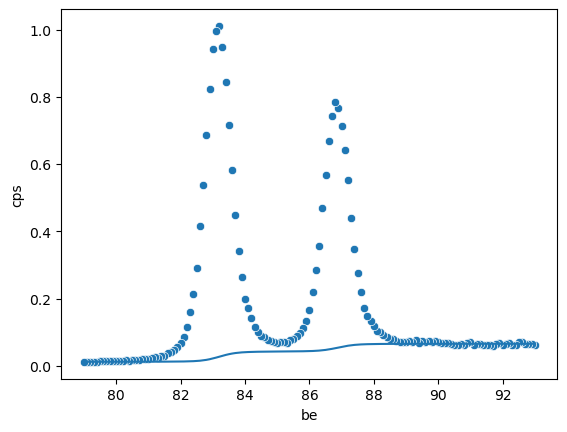

In [423]:
df = x.df_dict['Au']
fig, ax = plt.subplots()
sns.scatterplot(data=df, x="be", y="cps", ax=ax)
sns.lineplot(data=df, x="be", y="bg")

In [418]:
x.keys_list

['Au']

In [419]:
x.fit_data()